# Connect to G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
file_dir = '/content/drive/MyDrive/DS_PROJECT_PORTFOLIO/DS_PROJECT2_DATAVISUALIZATION/DS_Project2_DataVisualization_eCommerce'
os.chdir(file_dir)

In [3]:
!ls

'[Cleaned] ecommerce_dataset.csv'   '[Sandbox] DS Project 2.2 - DataVisualization.ipynb'
'[Cleaned] ecommerce_dataset.xlsx'


# Import Libraries

In [4]:
# Dataframe manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_style('whitegrid')
import math


# Import Dataset

In [5]:
df = pd.read_excel('[Cleaned] ecommerce_dataset.xlsx')
df.head()

,Unnamed: 0,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140,2,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211,3,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117,5,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118,2,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250,1,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51295 non-null  object        
 1   order_date        51295 non-null  datetime64[ns]
 2   ship_date         51295 non-null  datetime64[ns]
 3   aging             51295 non-null  float64       
 4   ship_mode         51295 non-null  object        
 5   product_category  51295 non-null  object        
 6   product           51295 non-null  object        
 7   sales($)          51295 non-null  int64         
 8   quantity          51295 non-null  int64         
 9   discount          51295 non-null  float64       
 10  profit($)         51295 non-null  float64       
 11  shipping_cost($)  51295 non-null  float64       
 12  order_priority    51295 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

# Helper Function

In [8]:
# Function to Plot Graph
def plotGraph(
    GraphPlot, xColumns, yColumns, title=None, xlabel=None, ylabel=None,
    NumberOfRows=5, DisplayRows=None, title_fontSize=14, label_fontSize=12,
    nrows=1, ncols=1
    ):

    """
      Nanti ini akan disii dengan dokumentasi dari function ini,
      untuk referensi dokumentasi akan menggunakan dokumentasi function google
      pada link berikut: https://android.googlesource.com/platform/external/google-styleguide/+/refs/tags/android-s-beta-2/pyguide.md
    """

    fig, ax= plt.subplots(figsize=(10,6), ncols=ncols, nrows=nrows)

    # Plot Lineplot
    if(GraphPlot == 'lineplot'):
      ax= (
          sns.lineplot(x= xColumns, y= yColumns),
          plt.xticks(rotation=20)
      )

    # Plot Barplot
    elif (GraphPlot == 'barplot'):
        if (DisplayRows == 'head'):
          ax= (
              sns.barplot(x= xColumns.value_counts().head(NumberOfRows).index, y= yColumns.value_counts().head(NumberOfRows), palette='pastel')
          )
        elif (DisplayRows == 'tail'):
          ax= (
              sns.barplot(x= xColumns.value_counts().tail(NumberOfRows).index, y= yColumns.value_counts().tail(NumberOfRows), palette='pastel')
          )
        else:
          ax= (
              sns.barplot(x= xColumns.value_counts().index, y= yColumns.value_counts(), palette='pastel')
          )

    ax.bar_label(ax.containers[0], color='black')
    plt.xticks(rotation=45)
    fig.suptitle(title, fontsize=title_fontSize)
    plt.xlabel(xlabel, fontsize=label_fontSize)
    plt.ylabel(ylabel, fontsize=label_fontSize)

In [9]:
def coba(dataframe, kolom=str, kolomhehe=str, Metode=str):
    if (Metode == 'sum'):
        mydata = dataframe.groupby(dataframe[kolom])[kolomhehe].sum()
        return mydata
    if (Metode == 'value_count'):
        return dataframe[kolom].value_counts()

# Data Visualization

## Profit Trend - Weekly

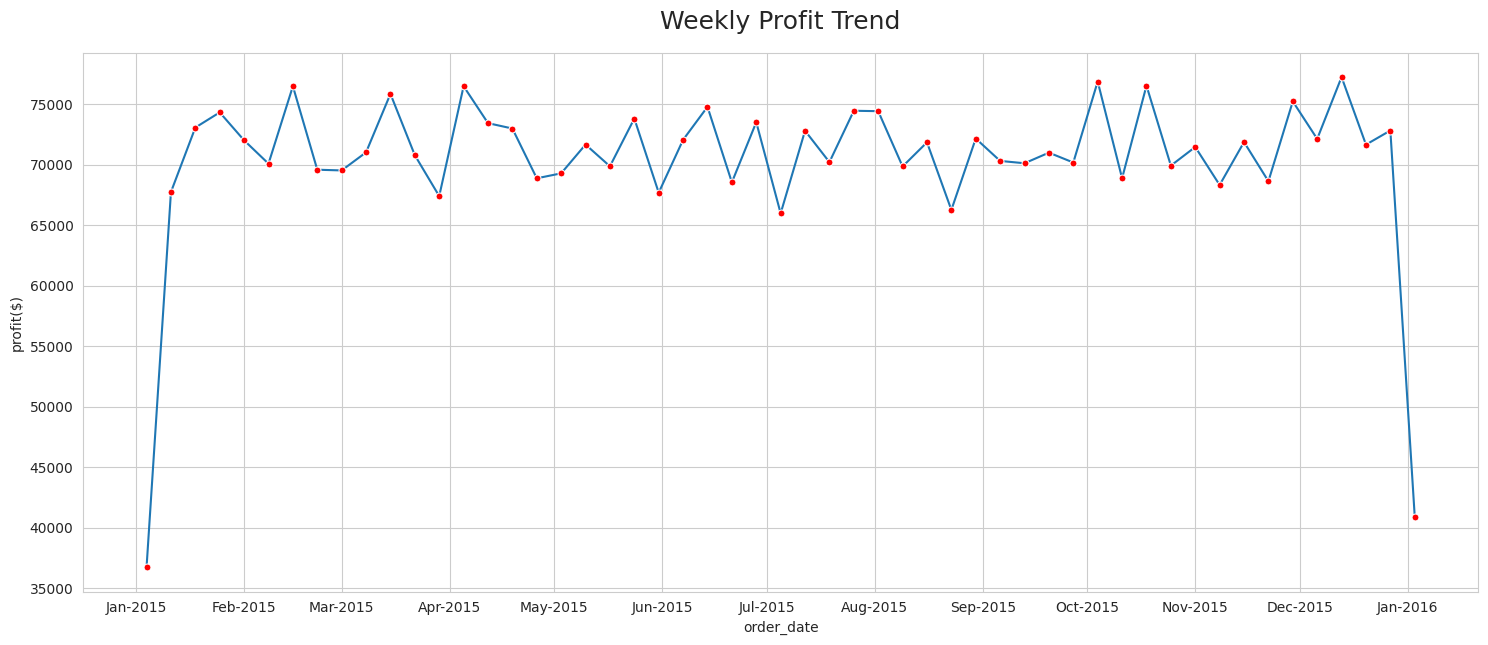

In [23]:
profit= df.groupby(by= pd.Grouper(key='order_date', freq='1W'))['profit($)'].sum()

fig, ax= plt.subplots(figsize=(18,7))
plt.title(
    'Weekly Profit Trend',
    fontdict={'fontsize':18},
    pad=17
)

ax= (
    sns.lineplot(
        profit,
        marker= '.',
        markersize= 10,
        markerfacecolor= 'red'
    ),
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)),
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
)

## Profit Trend - Monthly

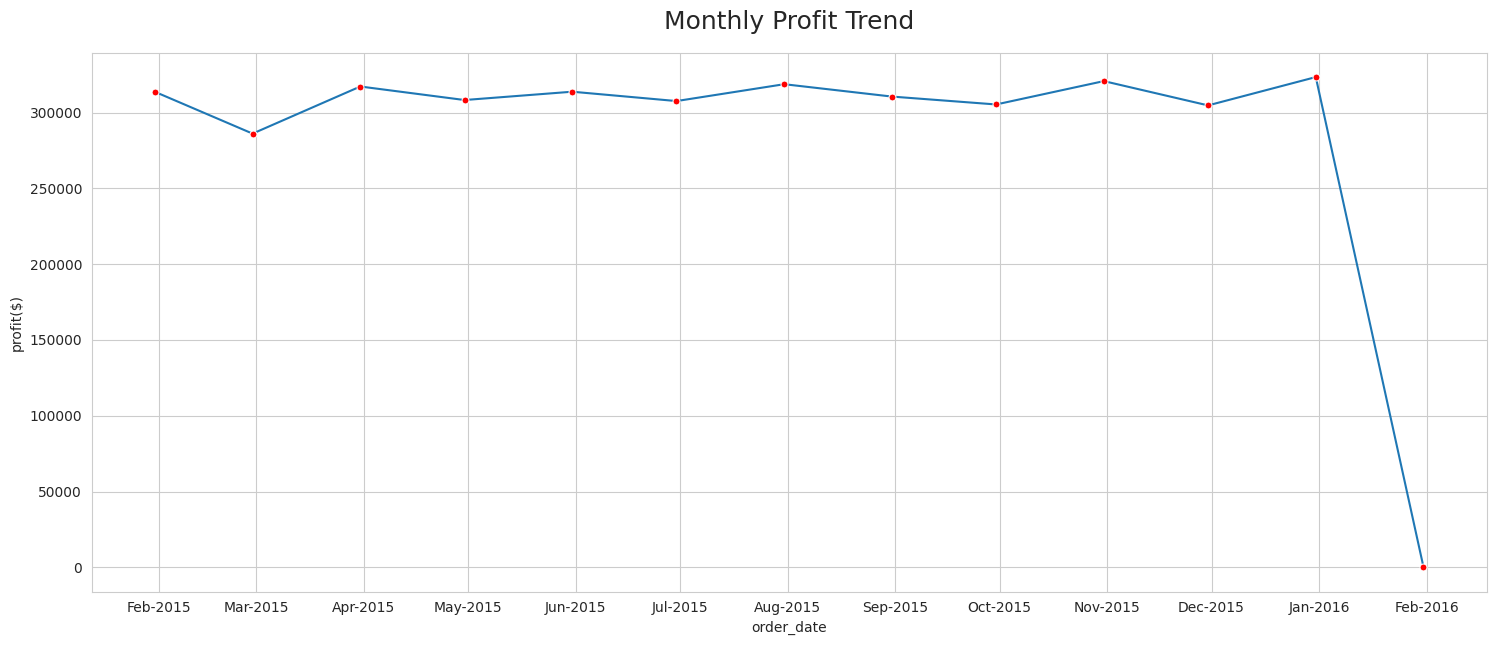

In [11]:
profit= df.groupby(by= pd.Grouper(key='order_date', freq='1M'))['profit($)'].sum()

fig, ax= plt.subplots(figsize=(18,7))
plt.title(
    'Monthly Profit Trend',
    fontdict={'fontsize':18},
    pad=17
)

ax= (
    sns.lineplot(
        profit,
        marker= '.',
        markersize= 10,
        markerfacecolor= 'red'
    ),
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)),
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
)

## Numerical Columns Analysis

array([[<Axes: title={'center': 'order_date'}>,
        <Axes: title={'center': 'ship_date'}>,
        <Axes: title={'center': 'aging'}>],
       [<Axes: title={'center': 'sales($)'}>,
        <Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'discount'}>],
       [<Axes: title={'center': 'profit($)'}>,
        <Axes: title={'center': 'shipping_cost($)'}>, <Axes: >]],
      dtype=object)

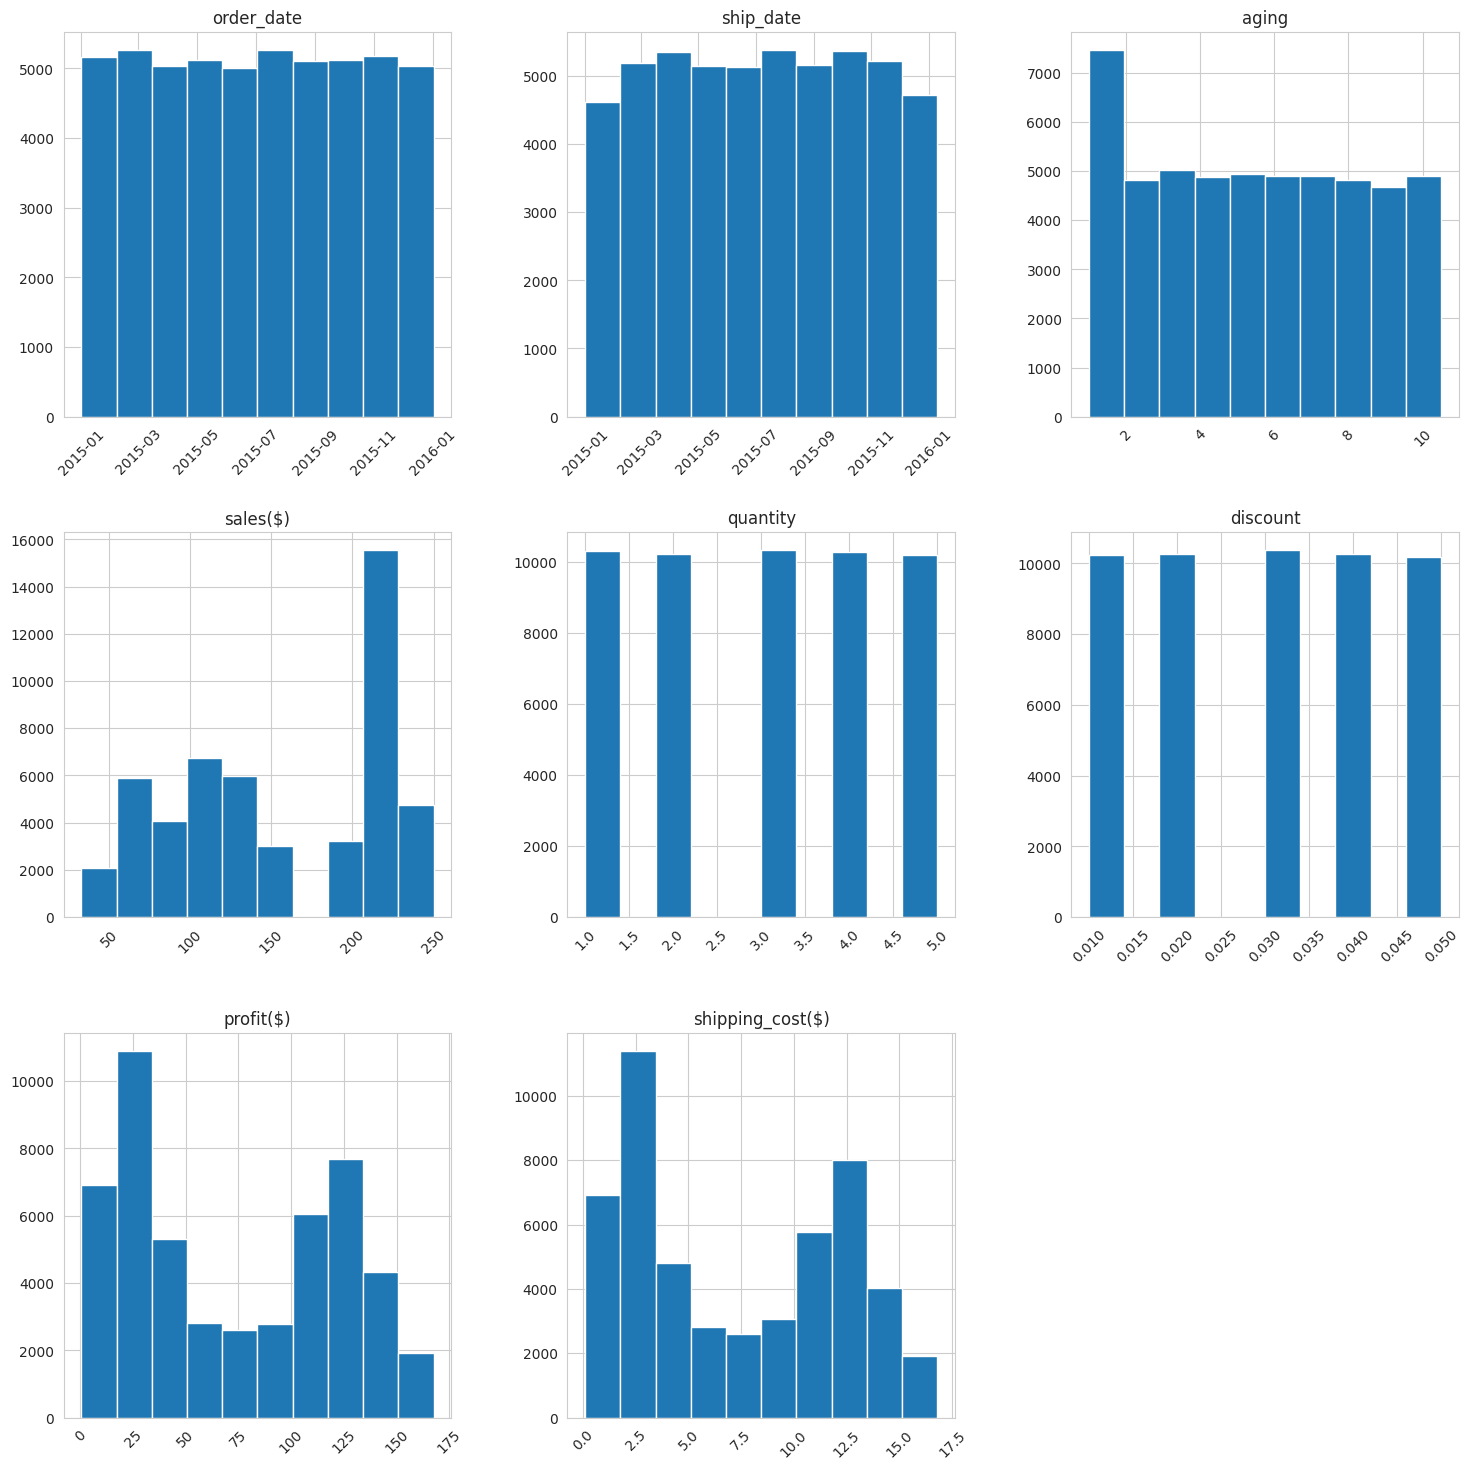

In [12]:
df_numeric= df.select_dtypes(exclude='object')
df_numeric.hist(figsize=(18,18), xrot=45)

## Categorical Columns Analysis

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_categoric= df.select_dtypes(exclude=numerics)
df_categoric.head()

,order_id,order_date,ship_date,ship_mode,product_category,product,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,First Class,Auto & Accessories,Car Media Players,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,First Class,Auto & Accessories,Car Speakers,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,First Class,Auto & Accessories,Car Body Covers,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,First Class,Auto & Accessories,Car & Bike Care,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,First Class,Auto & Accessories,Tyre,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [14]:
# Removing some columns
columns_remove = ['order_id',	'order_date',	'ship_date', 'customer_id', 'months', 'customer_name']
df_categoric.drop(columns_remove, axis=1, inplace=True)

In [15]:
df_categoric.head()

,ship_mode,product_category,product,order_priority,segment,city,state,country,region
0,First Class,Auto & Accessories,Car Media Players,Medium,Consumer,Brisbane,Queensland,Australia,Oceania
1,First Class,Auto & Accessories,Car Speakers,Medium,Home Office,Berlin,Berlin,Germany,Central
2,First Class,Auto & Accessories,Car Body Covers,Critical,Consumer,Porirua,Wellington,New Zealand,Oceania
3,First Class,Auto & Accessories,Car & Bike Care,High,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,First Class,Auto & Accessories,Tyre,Critical,Corporate,Townsville,Queensland,Australia,Oceania


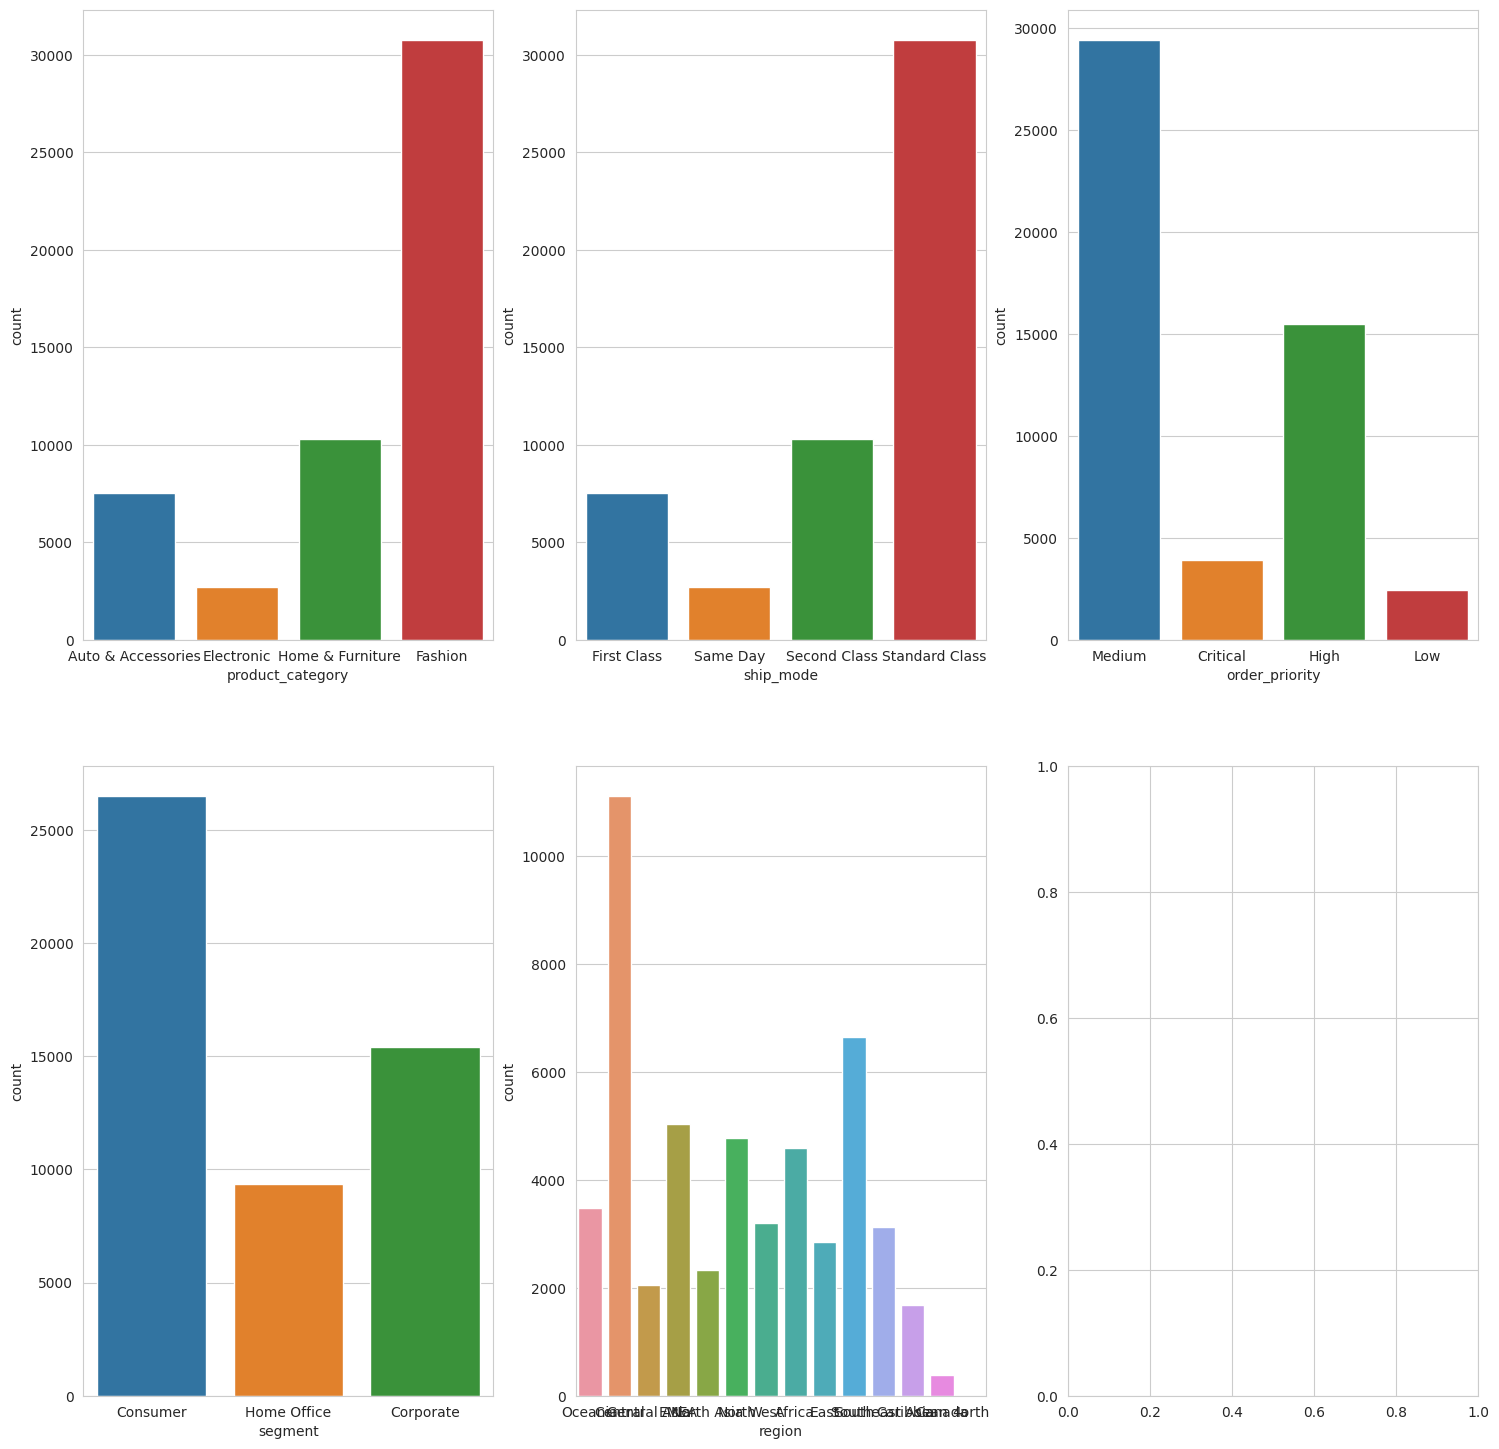

In [33]:
fig, axarr = plt.subplots(figsize=(18,18), ncols=3, nrows=2)

ax= (
    sns.countplot(x= df['product_category'], data=df_categoric, ax=axarr[0][0]),
    sns.countplot(x= df['ship_mode'], data=df_categoric, ax=axarr[0][1]),
    sns.countplot(x= df['order_priority'], data=df_categoric, ax=axarr[0][2]),
    sns.countplot(x= df['segment'], data=df_categoric, ax=axarr[1][0]),
    sns.countplot(x= df['region'], data=df_categoric, ax=axarr[1][1]),
)

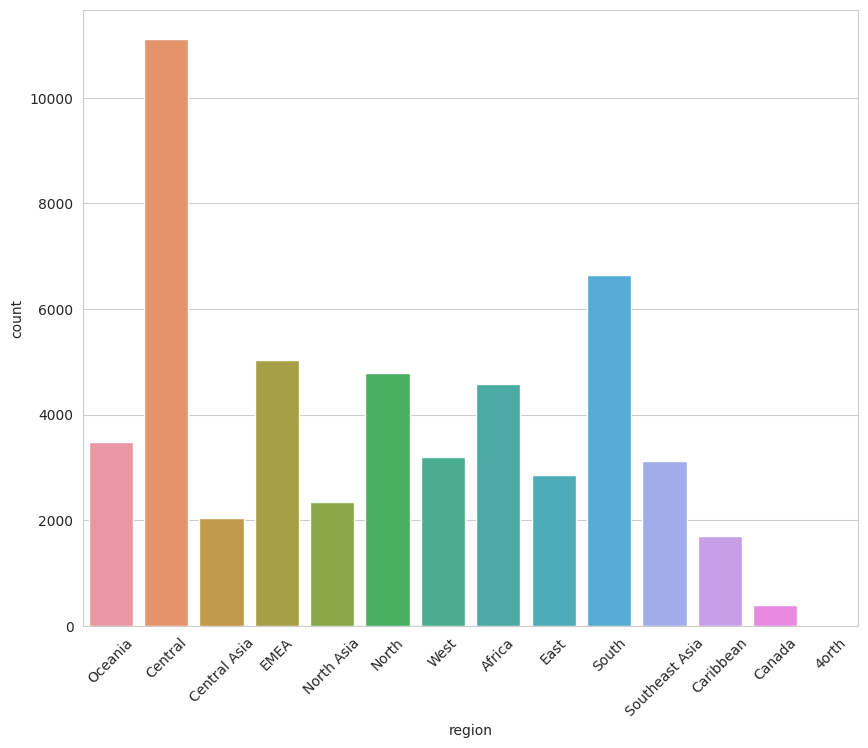

In [17]:
fig, axarr = plt.subplots(figsize=(10,8))

ax= (
   sns.countplot(x= df['region'], data=df_categoric),
   plt.xticks(rotation=45)
)